<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/iris2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Iris 데이터를 대상으로 모델링해서 붓꽃 품종을 예측해 봅니다.
- DecisionTree 알고리즘을 사용합니다.

![](https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**데이터 정보**

- Sepal.Length: 꽃받침의 길이
- Sepal.Width: 꽃받침의 너비
- Petal.Length: 꽃잎의 길이
- Petal.Width: 꽃잎의 너비

In [4]:
# 하위 몇 개 행 확인
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
# 변수 확인
print(data.info())
print(data['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [8]:
# 기술통계 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# 상관관계 확인
data.corr(numeric_only=True)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

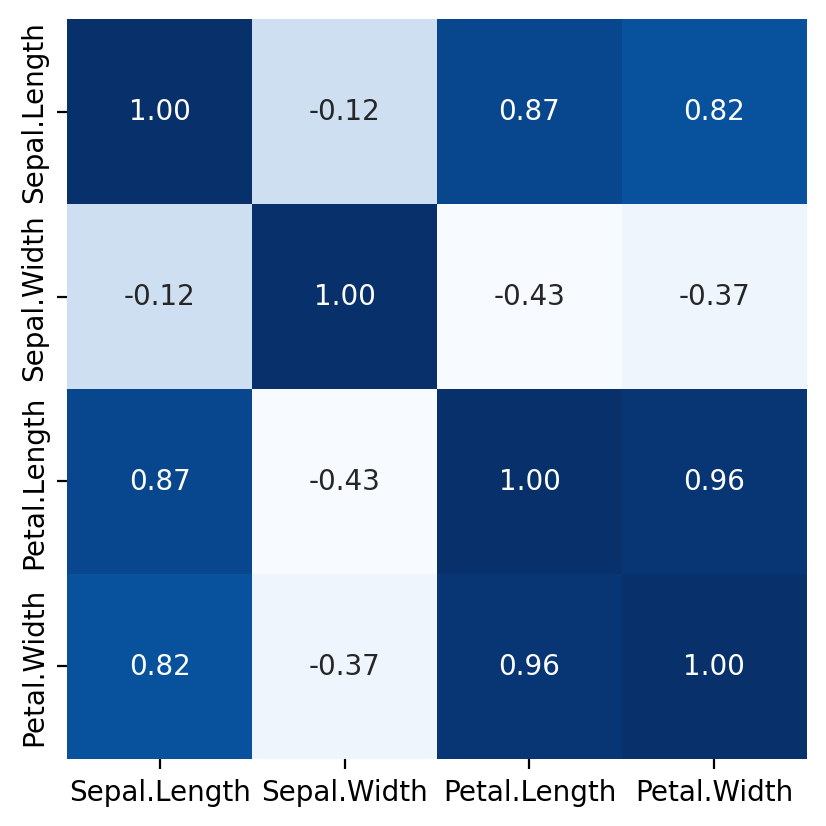

In [17]:
# 상관관계 시각화
sns.heatmap(data.corr(numeric_only=True),
           annot=True,
           fmt='.2f',
           cmap='Blues',
           square=True,
           cbar=False)



In [19]:
# species 0,1,2 로 mapping
data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [21]:
help(pd.DataFrame.replace)

Help on function replace in module pandas.core.frame:

replace(self, to_replace=None, value=<no_default>, *, inplace: 'bool' = False, limit: 'int | None' = None, regex: 'bool' = False, method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>) -> 'DataFrame | None'
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_repla

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [22]:
# target 확인
target = 'Species'

# 데이터 분리
X = data.drop('Species', axis = 1)
y = data.loc[:, 'Species']


**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [27]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True, stratify=y)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(105, 4) (105,)
(45, 4) (45,)
Species
setosa        35
virginica     35
versicolor    35
Name: count, dtype: int64
Species
virginica     15
setosa        15
versicolor    15
Name: count, dtype: int64


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: DecisionTreeClassifier
    - 평가방법: accuracy_score

In [29]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [30]:
# 2단계: 선언하기
model = DecisionTreeClassifier()

In [31]:
# 3단계: 학습하기
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [33]:
# 5단계 평가하기
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [34]:
# 실제값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

['virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa']
['virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa']


# 파이썬의 선 (철학) -> the Zen of Python

In [35]:
import this 

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
